In [1]:
import sys
sys.path.append('..')
from QCreator.transmission_line_simulator import *

In [2]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

To fit resonators you need to install resonator_tools: https://github.com/sebastianprobst/resonator_tools

# Create a curcuit

Firstly, we need to create a topology of a curcuit.
Each element has a type, a name and number of nodes characterized him.
1. element_1 = type()
2. circuit = transmission_line_system()
3. circuit.add_element(element_1, list of nodes)


In [3]:
claw = Capacitor()
source = Port()
analyzer = Port()

GND = Short()
resonator_short_end = TLCoupler(n=1)
resonator_claw_end = TLCoupler(n=1)
coupler = TLCoupler()

circuit = TLSystem()

circuit.add_element(source, [1])
circuit.add_element(coupler, [1, 2, 3, 4])
circuit.add_element(analyzer, [3])
circuit.add_element(resonator_short_end, [4, 0])
circuit.add_element(resonator_claw_end, [2, 5])
circuit.add_element(claw, [5, 0])
circuit.add_element(GND, [0])

In [4]:
source.Z0=50
analyzer.Z0=50

coupler.l=0.4e-3
coupler.Ll=np.asarray([[505.66e-9,151.132e-9],
                      [151.132e-9,529.989e-9]])
coupler.Cl=np.asarray([[153.342e-12,-43.727e-12],
                      [-43.727e-12,146.305e-12]])
coupler.Rl=np.zeros(coupler.Ll.shape, dtype=np.int)
coupler.Gl=np.zeros(coupler.Ll.shape, dtype=np.int)


resonator_short_end.l = 3.6e-3
resonator_short_end.Cl = 146.305e-12
resonator_short_end.Ll = 529.989e-9
resonator_short_end.Rl = 0
resonator_short_end.Gl = 0

resonator_claw_end.l = 1.0e-3
resonator_claw_end.Cl = 146.305e-12
resonator_claw_end.Ll = 529.989e-9
resonator_claw_end.Rl = 0
resonator_claw_end.Gl = 0

claw.C=0

<ipython-input-4-f0f58fa7a742>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coupler.Rl=np.zeros(coupler.Ll.shape, dtype=np.int)
<ipython-input-4-f0f58fa7a742>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in N

# Get resonance modes and Qs

In [9]:
from QCreator.auxiliary_functions import search_for_resonators_qubits

In [6]:
f, delta, modes=circuit.get_modes()

In [10]:
num_modes=18
(res_fr,kappa,_)=search_for_resonators_qubits(f,delta,0,15)[:num_modes]

Resonance frequencies are, GHz: [5.67832797]
Kappas are, us^-1: [27.63431804]
Quality factors are: [1291.07535178]


In [6]:
f, delta, modes=circuit.get_modes()

## Simulate scattering parameter S21

In [5]:
nop = 5000
frequency = np.linspace(4e9+0j, 6.5e9+0j, nop)
y = np.zeros(nop, dtype=complex)

In [14]:
matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[0]*2*np.pi)

In [15]:
perturbation = np.zeros((matrix_of_curcuit.shape[0],1))
perturbation[0]=1
for i in range(nop):
    matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[i]*2*np.pi)
    s21= np.linalg.solve(matrix_of_curcuit, perturbation)
    y[i]=s21[2]
S21 = y/np.max(y)

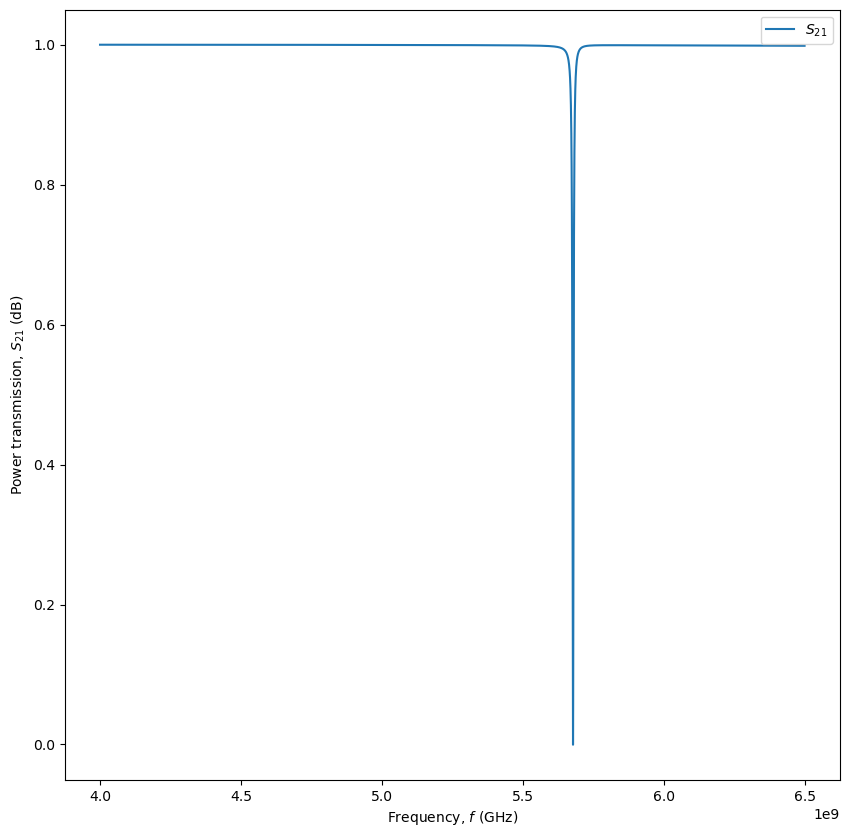

In [16]:
plt.plot(frequency.real, np.real(S21), label = '$S_{21}$')
plt.xlabel('Frequency, $f$ (GHz)')
plt.ylabel('Power transmission, $S_{21}$ (dB)')
plt.legend()
plt.show()

# Example 2: Qubit+resonator

In [3]:
source = Port()
analyzer = Port()
GND = Short()
circuit_res_qubit = TLSystem()

resonator_short_end = TLCoupler(n=1)
resonator_claw_end = TLCoupler(n=1)
coupler = TLCoupler()

claw_res_ground = Capacitor()
claw_res_qubit = Capacitor()

qubit_L=Inductor()
qubit_C=Capacitor()


circuit_res_qubit.add_element(source, [1])
circuit_res_qubit.add_element(coupler, [1, 2, 3, 4])
circuit_res_qubit.add_element(analyzer, [3])
circuit_res_qubit.add_element(resonator_short_end, [4, 0])
circuit_res_qubit.add_element(resonator_claw_end, [2, 5])
circuit_res_qubit.add_element(claw_res_qubit, [5, 6])
circuit_res_qubit.add_element(claw_res_ground, [5, 0])

circuit_res_qubit.add_element(qubit_C, [6, 0])
circuit_res_qubit.add_element(qubit_L, [6, 0])

circuit_res_qubit.add_element(GND, [0])


In [73]:
source.Z0=50
analyzer.Z0=50

coupler.l=0.4e-3
# resonator_feedline distances 12 21 12 8 10 15 10 Zr=52.5
coupler.Ll=np.asarray([[423.058e-9,41.177e-9],
                      [41.177e-9,442.626e-9]])
coupler.Cl=np.asarray([[165.215e-12,-15.37e-12],
                      [-15.37e-12,157.911e-12]])
coupler.Rl=np.zeros(coupler.Ll.shape, dtype=np.int)
coupler.Gl=np.zeros(coupler.Ll.shape, dtype=np.int)


resonator_short_end.l = 3.6e-3
resonator_short_end.Cl = 158.581e-12
resonator_short_end.Ll = 436.764e-9
resonator_short_end.Rl = 0
resonator_short_end.Gl = 0

resonator_claw_end.l = 1.0e-3
resonator_claw_end.Cl = 158.581e-12
resonator_claw_end.Ll = 436.764e-9
resonator_claw_end.Rl = 0
resonator_claw_end.Gl = 0

claw_res_ground.C=40e-15
claw_res_qubit.C=2e-15

qubit_C.C=80e-15
qubit_L.L=30e-9

<ipython-input-73-7d87d5bfea96>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coupler.Rl=np.zeros(coupler.Ll.shape, dtype=np.int)
<ipython-input-73-7d87d5bfea96>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated i

In [74]:
1/2/np.pi/np.sqrt(qubit_C.C*qubit_L.L)/1e9

3.248736671806984

# Get resonance modes and Qs

In [75]:
from QCreator.auxiliary_functions import search_for_resonators_qubits

In [76]:
f, delta, modes=circuit_res_qubit.get_modes()

In [77]:
f/2/np.pi/1e9, 2*delta/1e6

(array([  3.20877628,   5.70720533,  17.11858317,  28.60951987,
         39.80416816,  46.42515622,  53.58784598,  54.89827881,
         54.90090105,  55.21508579,  55.2165133 ,  78.97234622,
        114.13643741, 147.65748627, 148.70975048, 169.27877937,
        185.34855862, 196.90649537, 197.85816671, 197.92166022,
        198.54920027, 198.58521888, 284.7502958 , 291.20133513,
        302.52112918, 387.01577781, 418.85706017, 419.66181456,
        439.94809384, 481.43489987, 481.61976574, 495.43301257,
        495.96834101, 515.04995101, 515.32738587, 726.56639206]),
 array([ 5.33621908e-05,  2.92124788e+00,  2.61058843e+01,  6.72089627e+01,
         9.50778967e+01,  5.99415129e+01,  1.93286538e+02,  3.56838375e+05,
        -3.56945219e+05, -3.63360858e+05,  3.63469977e+05,  6.15398169e+02,
         3.07469967e+02,  3.03008257e+06,  4.98725990e-01,  4.72400225e+01,
         4.18441716e+06,  6.30289625e+02,  1.28265236e+06, -1.28681885e+06,
        -1.30626002e+06,  1.31060952e+06, 

In [78]:
num_modes=18
(res_fr,kappa,_)=search_for_resonators_qubits(f,delta,0,15)[:num_modes]

Resonance frequencies are, GHz: [3.20877628 5.70720533]
Kappas are, us^-1: [5.33621908e-05 2.92124788e+00]
Quality factors are: [3.77820619e+08 1.22753803e+04]


In [123]:
Zr=52.5
g_coupling_without_freqs=0.5*claw_res_qubit.C/np.sqrt(qubit_C.C)*np.sqrt(Zr)
def freqs_T1(Ls,circuit_model,g_coupling_without_freqs):
    # works for qubit freqs below the 2nd fundamental resonator mode
    qubit_freqs=[]
    kappas=[]
    single_mode_purcell=[]
    counter=0
    for L in Ls:
        qubit_L.L=L
        f, delta, modes=circuit_model.get_modes()
        if np.abs(f[0]/2/np.pi/1e9-f[1]/2/np.pi/1e9)>0.09:
            if counter==0:
                qubit_freqs.append(f[0]/2/np.pi/1e9)
                kappas.append(1/(2*delta[0]/1e6))
                g=g_coupling_without_freqs*np.sqrt(f[0])*f[1]/2/np.pi/1e9
                kappa_res=1/(2*delta[1]/1e6)
            else:
                qubit_freqs.append(f[1]/2/np.pi/1e9)
                kappas.append(1/(2*delta[1]/1e6))
                g=g_coupling_without_freqs*np.sqrt(f[1])*f[0]/2/np.pi/1e9
                kappa_res=2*delta[0]/1e6
            single_mode_purcell.append(kappa_res/(g/(f[0]/2/np.pi/1e9-f[1]/2/np.pi/1e9))**2)
        else:
            counter=1
    return qubit_freqs,kappas,single_mode_purcell

In [124]:
Ls=np.linspace(30e-9,5e-9,200)

In [125]:
qubit_freqs,T1,single_mode_purcell=freqs_T1(Ls,circuit_res_qubit,g_coupling_without_freqs)

In [96]:
import matplotlib.pyplot as plt

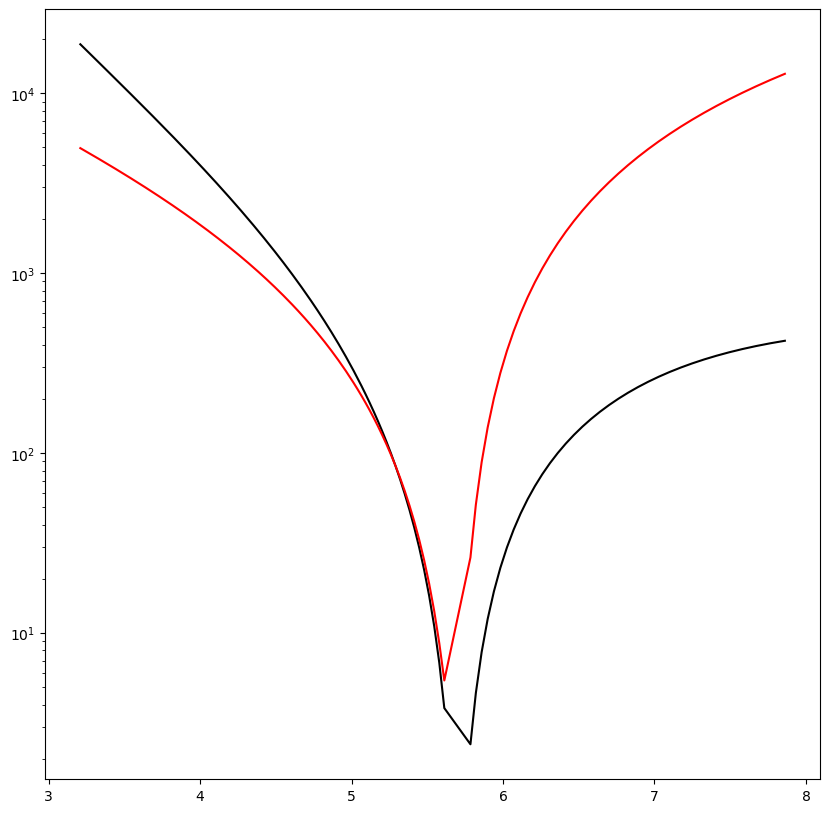

In [126]:
plt.semilogy(qubit_freqs,T1,'k')
plt.semilogy(qubit_freqs,single_mode_purcell,'r')
plt.show()

## Simulate scattering parameter S21

In [5]:
nop = 5000
frequency = np.linspace(4e9+0j, 6.5e9+0j, nop)
y = np.zeros(nop, dtype=complex)

In [14]:
matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[0]*2*np.pi)

In [15]:
perturbation = np.zeros((matrix_of_curcuit.shape[0],1))
perturbation[0]=1
for i in range(nop):
    matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[i]*2*np.pi)
    s21= np.linalg.solve(matrix_of_curcuit, perturbation)
    y[i]=s21[2]
S21 = y/np.max(y)

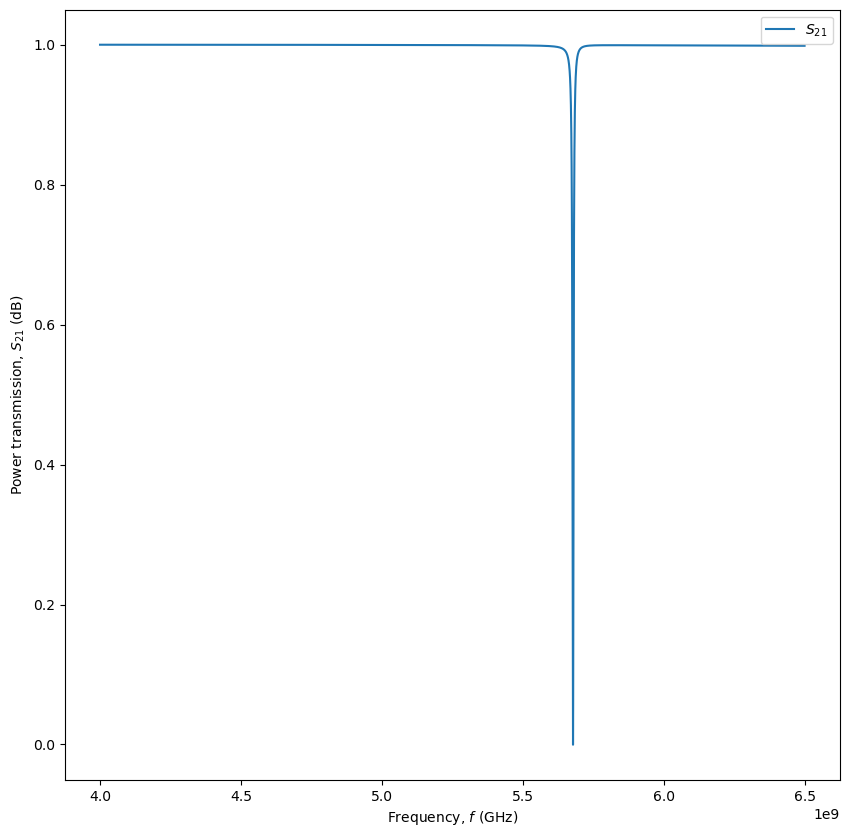

In [16]:
plt.plot(frequency.real, np.real(S21), label = '$S_{21}$')
plt.xlabel('Frequency, $f$ (GHz)')
plt.ylabel('Power transmission, $S_{21}$ (dB)')
plt.legend()
plt.show()

In [85]:
analyzer_feedline = transmission_line_coupler(n=1)
analyzer_cap = capacitor()

claw = capacitor()
source = port()


GND = short()
resonator_short_end = transmission_line_coupler(n=1)
resonator_claw_end = transmission_line_coupler(n=1)
coupler = transmission_line_coupler()

circuit = transmission_line_system()

circuit.add_element(source, [1])
circuit.add_element(coupler, [1, 2, 3, 4])
circuit.add_element(analyzer_feedline, [3,5])
circuit.add_element(analyzer_cap, [5,0])
circuit.add_element(resonator_short_end, [4, 0])
circuit.add_element(resonator_claw_end, [2, 6])
circuit.add_element(claw, [6, 0])
circuit.add_element(GND, [0])

In [86]:
source.Z0=50

coupler.l=0.4e-3
coupler.Ll=np.asarray([[505.66e-9,151.132e-9],
                      [151.132e-9,529.989e-9]])
coupler.Cl=np.asarray([[153.342e-12,-43.727e-12],
                      [-43.727e-12,146.305e-12]])
coupler.Rl=np.zeros(coupler.Ll.shape, dtype=np.int)
coupler.Gl=np.zeros(coupler.Ll.shape, dtype=np.int)


resonator_short_end.l = 3.6e-3
resonator_short_end.Cl = 146.305e-12
resonator_short_end.Ll = 529.989e-9
resonator_short_end.Rl = 0
resonator_short_end.Gl = 0

resonator_claw_end.l = 1.0e-3
resonator_claw_end.Cl = 146.305e-12
resonator_claw_end.Ll = 529.989e-9
resonator_claw_end.Rl = 0
resonator_claw_end.Gl = 0

analyzer_feedline.l = 1.5e-3
analyzer_feedline.Cl = 153.342e-12
analyzer_feedline.Ll = 505.66e-9
analyzer_feedline.Rl = 0
analyzer_feedline.Gl = 0

analyzer_cap.C=1e-15

claw.C=0

## Simulate scattering parameter S21

In [88]:
nop = 5000
frequency = np.linspace(5e9+0j, 6e9+0j, nop)
y = np.zeros(nop, dtype=complex)
matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[0]*2*np.pi)

In [89]:
perturbation = np.zeros((matrix_of_curcuit.shape[0],1))
perturbation[0]=1
for i in range(nop):
    matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[i]*2*np.pi)
    s21= np.linalg.solve(matrix_of_curcuit, perturbation)
    y[i]=s21[2]
S21 = y/np.max(y)

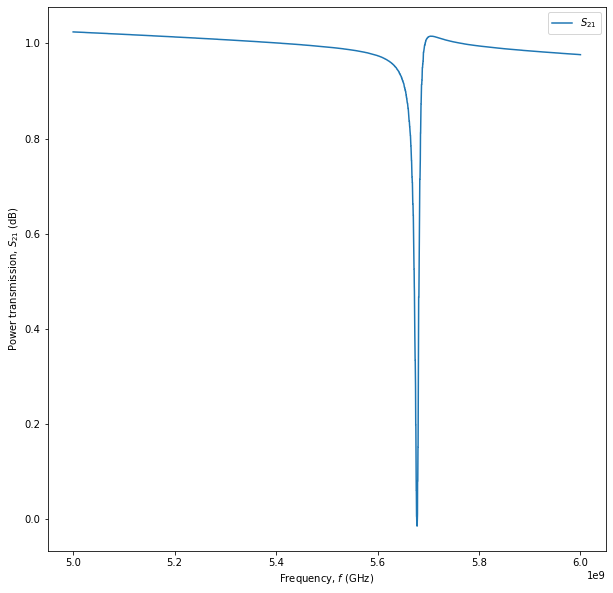

In [90]:
plt.plot(frequency.real, np.real(S21), label = '$S_{21}$')
plt.xlabel('Frequency, $f$ (GHz)')
plt.ylabel('Power transmission, $S_{21}$ (dB)')
plt.legend()
plt.show()

## Fit S-parameters

In [92]:
fitter = notch_port(f_data=frequency.real, z_data_raw=S21)

In [93]:
fitter.autofit(0.02e-9)

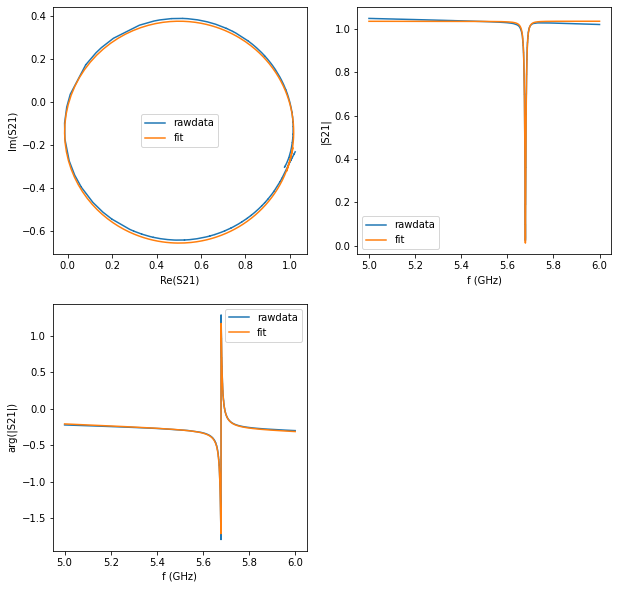

In [94]:
fitter.plotall()

In [95]:
fitter.fitresults

{'Qi_dia_corr': 153714.4045757643,
 'Qi_no_corr': 158537.54069723355,
 'absQc': 623.9877932746809,
 'Qc_dia_corr': 624.0648638605581,
 'Ql': 621.541468651837,
 'fr': 5678453631.85706,
 'theta0': 3.125876403469608,
 'phi0': -0.01571625012018515,
 'phi0_err': 0.00305054636530044,
 'Ql_err': 3.022124476411548,
 'absQc_err': 1.9456894416558466,
 'fr_err': 17059.117761926227,
 'chi_square': 0.00013347426451549581,
 'Qi_no_corr_err': 142605.7276070001,
 'Qi_dia_corr_err': 134085.12525874528}

In [96]:
(fitter.fitresults['fr']/1e9,fitter.fitresults['fr_err']/1e9)

(5.67845363185706, 1.7059117761926228e-05)

In [97]:
(fitter.fitresults['Ql'],fitter.fitresults['Ql_err'])

(621.541468651837, 3.022124476411548)

# Purcell filter+resonator+qubit

In [4]:
resonator_claw_ground = capacitor()
resonator_claw_qubit = capacitor()
GND = short()
GND1 = short()
GND2 = short()
GND3 = short()
GND4 = short()
GND5 = short()

feedline_cap = capacitor()
purcell_cap = capacitor()
qubit_cap = capacitor()
qubit_inductor = inductor()

source = port()
analyzer_feedline = transmission_line_coupler(n=1)


resonator_short_end = transmission_line_coupler(n=1)
resonator_claw_end = transmission_line_coupler(n=1)#
feedline_coupler = transmission_line_coupler()
purcell_coupler = transmission_line_coupler()
purcell_short_end_before_coupler = transmission_line_coupler(n=1)
purcell_claw_end = transmission_line_coupler(n=1)#

circuit = transmission_line_system()
circuit.add_element(source, [1])
circuit.add_element(feedline_coupler, [1, 2, 3, 4])
circuit.add_element(analyzer_feedline, [3, 5])
circuit.add_element(feedline_cap, [5, 12])

circuit.add_element(purcell_claw_end, [2, 6])
circuit.add_element(purcell_cap, [6, 13])
circuit.add_element(purcell_short_end_before_coupler, [4, 7])
circuit.add_element(purcell_coupler, [7, 8,14,15])
circuit.add_element(resonator_short_end, [8,9])

circuit.add_element(resonator_claw_end, [9,10])
circuit.add_element(resonator_claw_ground, [10,16])
circuit.add_element(resonator_claw_qubit, [10,11])
circuit.add_element(qubit_cap, [11, 0])
circuit.add_element(qubit_inductor, [11, 0])
circuit.add_element(GND, [0])
circuit.add_element(GND1, [12])
circuit.add_element(GND2, [13])
circuit.add_element(GND3, [14])
circuit.add_element(GND4, [15])
circuit.add_element(GND5, [16])

In [21]:
source.Z0=50

feedline_coupler.l=0.4e-3
feedline_coupler.Ll=np.asarray([[473.815e-9,175.09e-9],[175e-9,556.2e-9]])
feedline_coupler.Cl=np.asarray([[164.76e-12,-51.866e-12],[-51.866e-12,140.355e-12]])
feedline_coupler.Rl=np.zeros(feedline_coupler.Ll.shape, dtype=np.int)
feedline_coupler.Gl=np.zeros(feedline_coupler.Ll.shape, dtype=np.int)

analyzer_feedline.l = 1e-3
analyzer_feedline.Cl = 176.494e-12
analyzer_feedline.Ll = 401.892e-9
analyzer_feedline.Rl = 0
analyzer_feedline.Gl = 0

feedline_cap.C=10e-15

purcell_claw_end.l = 1e-3
purcell_claw_end.Cl = 176.494e-12
purcell_claw_end.Ll = 401.892e-9
purcell_claw_end.Rl = 0
purcell_claw_end.Gl = 0

purcell_cap.C=10e-15

purcell_short_end_before_coupler.l = 3.6e-3
purcell_short_end_before_coupler.Cl = 176.494e-12
purcell_short_end_before_coupler.Ll = 401.892e-9
purcell_short_end_before_coupler.Rl = 0
purcell_short_end_before_coupler.Gl = 0

purcell_coupler.l=20e-6
purcell_coupler.Ll=np.asarray([[473.815e-9,175.09e-9],[175e-9,556.2e-9]])
purcell_coupler.Cl=np.asarray([[164.76e-12,-51.866e-12],[-51.866e-12,140.355e-12]])
purcell_coupler.Rl=np.zeros(purcell_coupler.Ll.shape, dtype=np.int)
purcell_coupler.Gl=np.zeros(purcell_coupler.Ll.shape, dtype=np.int)


resonator_short_end.l = 4e-3
resonator_short_end.Cl = 176.494e-12
resonator_short_end.Ll = 401.892e-9
resonator_short_end.Rl = 0
resonator_short_end.Gl = 0

resonator_claw_end.l = 1e-3
resonator_claw_end.Cl = 176.494e-12
resonator_claw_end.Ll = 401.892e-9
resonator_claw_end.Rl = 0
resonator_claw_end.Gl = 0

resonator_claw_ground.C=10e-15
resonator_claw_qubit.C=10e-15
qubit_cap.C=45e-15
qubit_inductor.L=19e-9

In [31]:
1/np.sqrt((qubit_cap.C+resonator_claw_qubit.C)*qubit_inductor.L)/2/np.pi/1e9

4.9233644611976635

## Simulate scattering parameter S21

### Purcell + resonator

In [27]:
nop = 1000
frequency = np.linspace(5.75e9+0j, 6.25e9+0j, nop)
y = np.zeros(nop, dtype=complex)
matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[0]*2*np.pi)

In [28]:
perturbation = np.zeros((matrix_of_curcuit.shape[0],1))
perturbation[0]=1
for i in range(nop):
    matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[i]*2*np.pi)
    s21= np.linalg.solve(matrix_of_curcuit, perturbation)
    y[i]=s21[2]
S21 = y/np.max(y)

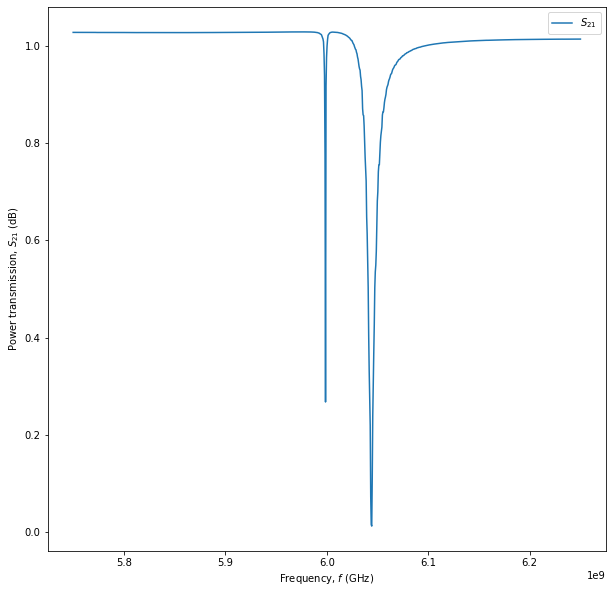

In [30]:
plt.plot(frequency.real, np.abs(S21), label = '$S_{21}$')
plt.xlabel('Frequency, $f$ (GHz)')
plt.ylabel('Power transmission, $S_{21}$ (dB)')
plt.legend()
plt.show()

### Qubit

In [110]:
nop = 5000
frequency = np.linspace(4.94641e9+0j, 4.946411e9+0j, nop)
y = np.zeros(nop, dtype=complex)
matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[0]*2*np.pi)

In [111]:
perturbation = np.zeros((matrix_of_curcuit.shape[0],1))
perturbation[0]=1
for i in range(nop):
    matrix_of_curcuit=circuit.create_boundary_problem_matrix(frequency[i]*2*np.pi)
    s21= np.linalg.solve(matrix_of_curcuit, perturbation)
    y[i]=s21[2]
S21 = y/np.max(y)

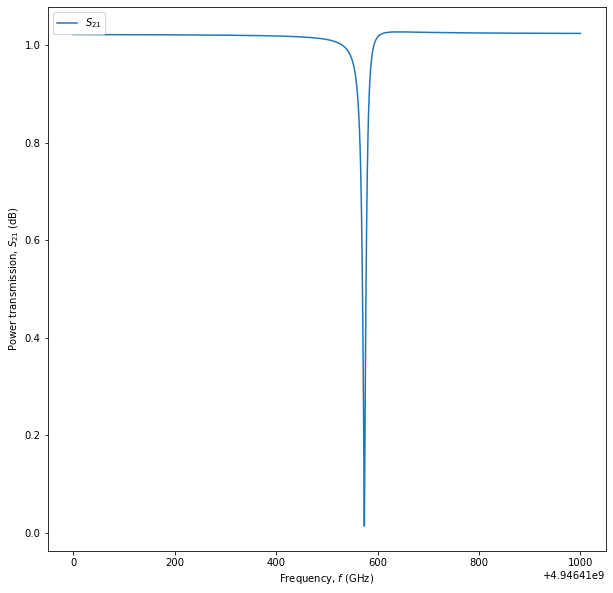

In [112]:
plt.plot(frequency.real, np.abs(S21), label = '$S_{21}$')
plt.xlabel('Frequency, $f$ (GHz)')
plt.ylabel('Power transmission, $S_{21}$ (dB)')
plt.legend()
plt.show()

In [113]:
fitter = notch_port(f_data=frequency.real, z_data_raw=S21)

In [116]:
fitter.autofit(fcrop = (4.9464104e9, 4.946411e9+0))

C:\Users\Ivan\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 200.
  warnings.warn(errors[info][0], RuntimeWarning)


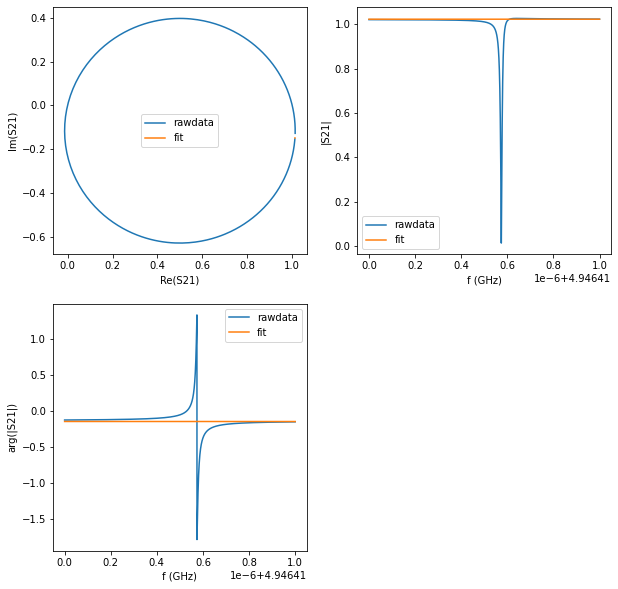

In [117]:
fitter.plotall()

In [119]:
fitter.fitresults

{'Qi_dia_corr': -9.708682730567634e+22,
 'Qi_no_corr': 1.7672346381239684e+20,
 'absQc': -5.969976227704401e+17,
 'Qc_dia_corr': -5.99024899675164e+17,
 'Ql': -5.99021203719426e+17,
 'fr': 4945938609.335183,
 'theta0': -3.059297994193728,
 'phi0': 0.08229465984558215,
 'phi0_err': 9.712224044230057e+17,
 'Ql_err': 6.651114732727485e+49,
 'absQc_err': 6.447530444791367e+33,
 'fr_err': 5.102657434055127e+21,
 'chi_square': 0.031795754487987556,
 'Qi_no_corr_err': 5.788932410556867e+54,
 'Qi_dia_corr_err': 1.747151907141794e+60}